In [45]:

try:
    from pint import UnitRegistry
except ImportError:
    !pip install pint

# import units
from pint import UnitRegistry
units = UnitRegistry()

In [46]:

from os.path import basename, exists

def download(url):
    filename = basename(url)
    if not exists(filename):
        from urllib.request import urlretrieve
        local, _ = urlretrieve(url, filename)
        print('Downloaded ' + local)

download('https://raw.githubusercontent.com/AllenDowney/' +
         'ModSimPy/master/modsim.py')

In [47]:

from modsim import *

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp
from modsim import System, State, run_solve_ivp

In [49]:

mass = 0.5
spring_constant = 10.0
initial_position = 0.5
initial_velocity = 0.0

In [50]:
system = System(
    mass=mass,
    k=spring_constant,
    init=State(y=initial_position, v=initial_velocity),
    t_end=10,
)

In [51]:
def slope_func(t, state, system):
    y, v = state
    mass, k = system.mass, system.k

    dydt = v
    dvdt = -k / mass * y

    return dydt, dvdt


In [52]:
results, details = run_solve_ivp(system, slope_func)
details.message

'The solver successfully reached the end of the integration interval.'

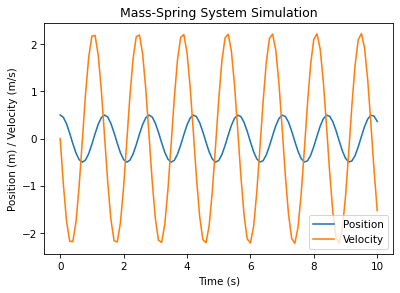

In [53]:
plt.plot(results.index, results.y, label='Position')
plt.plot(results.index, results.v, label='Velocity')
plt.xlabel('Time (s)')
plt.ylabel('Position (m) / Velocity (m/s)')
plt.title('Mass-Spring System Simulation')
plt.legend()
plt.show()